In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

import pandas as pd
import numpy as np

## 1) 콘텐츠 유형별 트래픽 현황

In [2]:
df = pd.read_csv('data/콘텐츠_유형별_트래픽_현황_2019-2020(분기별).csv')
df

,콘텐츠유형별(1),2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4
0,합계,7727.9,9300.7,11023.4,12570.8,12757.5,12339.5,12660.6
1,동영상,4287.2,5081.7,6141.8,7252.3,7410.2,6537.8,7377.4
2,멀티미디어,586.0,754.3,776.3,1157.7,1035.2,1180.9,1143.8
3,웹포털,1343.1,1494.8,1861.0,1990.6,1779.6,2018.4,1903.2
4,SNS,1154.5,1398.9,1531.0,1423.3,1802.0,1910.7,1567.3
5,마켓다운로드,252.2,376.9,475.3,442.4,405.0,393.4,374.6
6,기타,105.0,194.2,238.0,304.5,325.4,298.2,294.3


In [4]:
df.describe()

,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2207.985714,2657.357143,3149.542857,3591.657143,3644.985714,3525.557143,3617.314286
std,2814.513858,3362.438363,4010.240872,4617.680501,4697.856846,4422.709230,4667.902817
min,105.000000,194.200000,238.000000,304.500000,325.400000,298.200000,294.300000
25%,419.100000,565.600000,625.800000,800.050000,720.100000,787.150000,759.200000
50%,1154.500000,1398.900000,1531.000000,1423.300000,1779.600000,1910.700000,1567.300000
75%,2815.150000,3288.250000,4001.400000,4621.450000,4606.100000,4278.100000,4640.300000
max,7727.900000,9300.700000,11023.400000,12570.800000,12757.500000,12339.500000,12660.600000


In [6]:
df_melt = df.melt(id_vars='콘텐츠유형별(1)', var_name='분기', value_name='트래픽')

In [9]:
df_total= df_melt[df_melt['콘텐츠유형별(1)']=='합계']
df_content= df_melt[df_melt['콘텐츠유형별(1)']!='합계']

<AxesSubplot:xlabel='분기', ylabel='트래픽'>

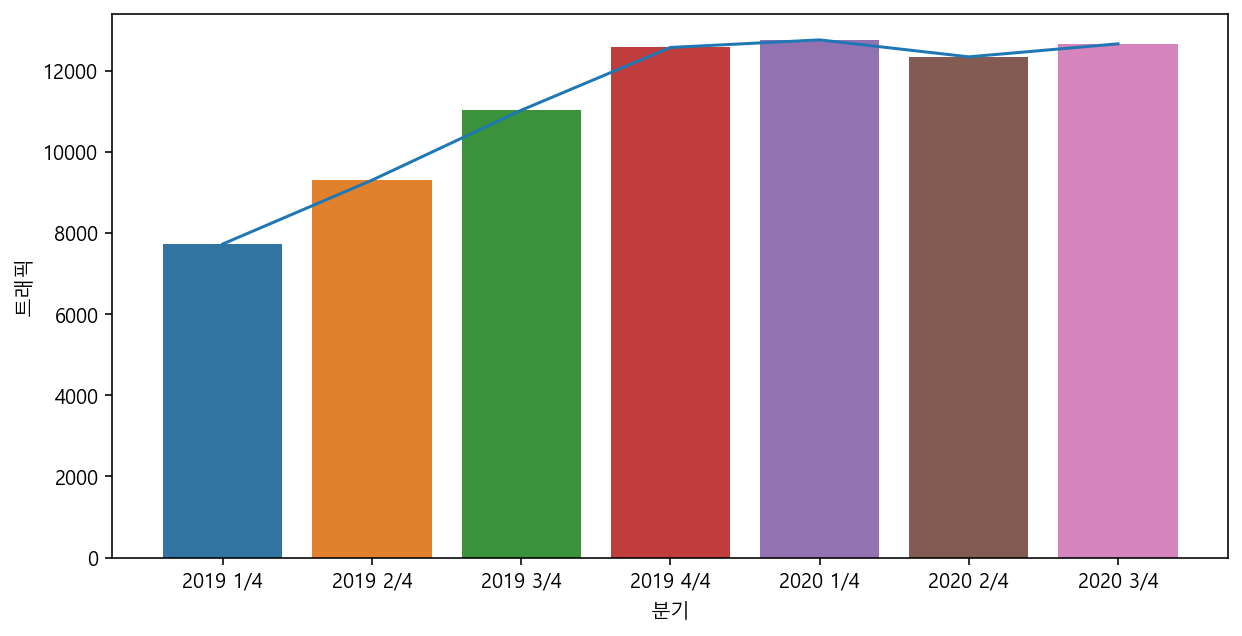

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='분기', y='트래픽', data=df_total)
sns.lineplot(x='분기', y='트래픽', data=df_total)

<AxesSubplot:xlabel='분기', ylabel='트래픽'>

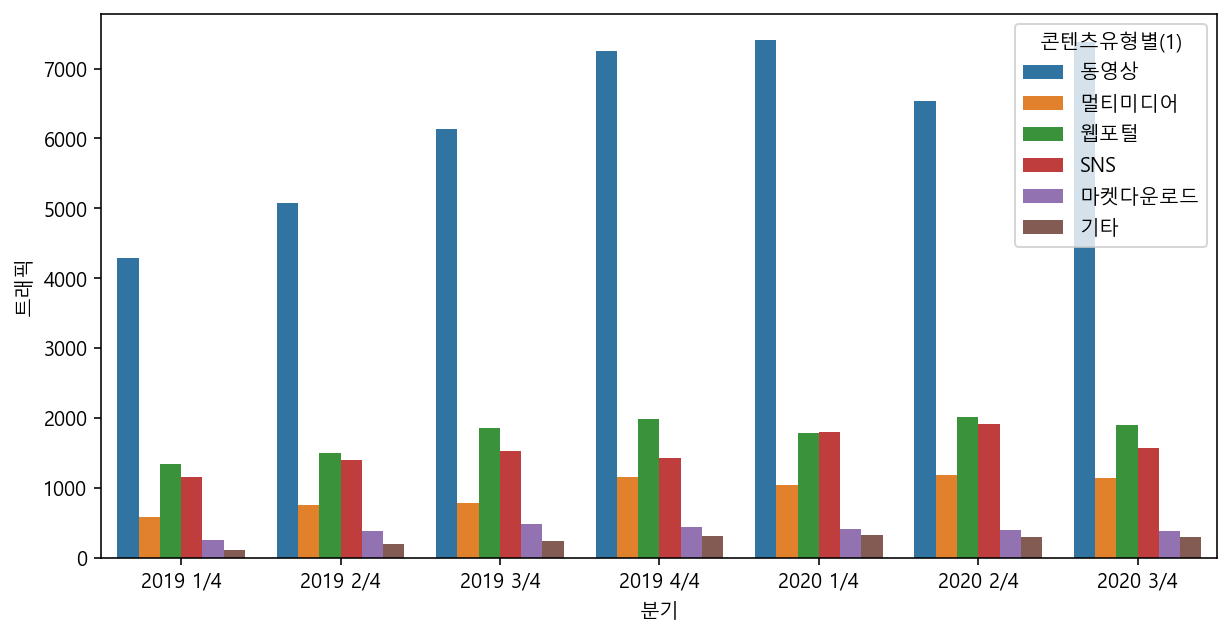

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='분기', y='트래픽', hue='콘텐츠유형별(1)', data=df_content)

<AxesSubplot:xlabel='콘텐츠유형별(1)', ylabel='트래픽'>

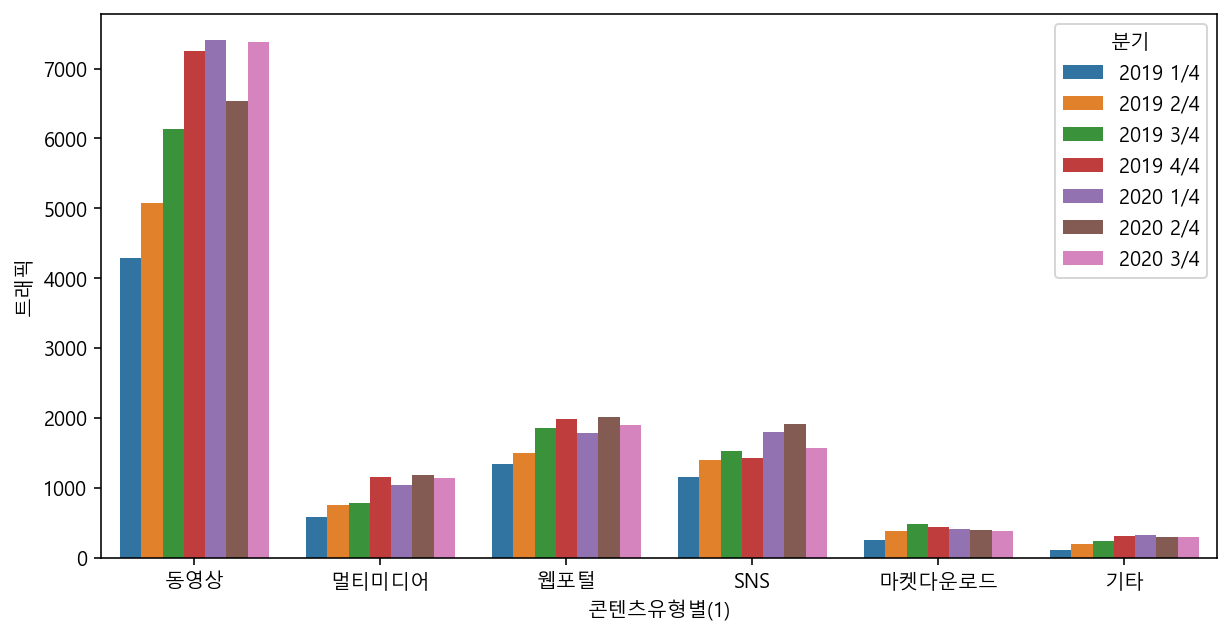

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='콘텐츠유형별(1)', y='트래픽', hue='분기', data=df_content)

## 2) 영화 관객수 및 매출액

In [62]:
df = pd.read_csv('data/월별_영화_총관객수및매출액.csv', encoding='cp949')

In [63]:
df = df.iloc[:, [0, 11,12,13,14]]
df = df.rename(columns=df.iloc[0])
df = df.drop([df.index[0]])
df['년월'] = df['년월'].map(lambda x:x[2:7])
df

,년월,개봉편수,상영편수,매출액,관객수
1,20-01,165,406,"143,681,061,430","16,843,695"
2,20-02,150,369,"62,303,647,980","7,372,370"
3,20-03,154,344,"15,152,718,950","1,834,722"
4,20-04,180,429,"7,515,666,040","972,572"
5,20-05,157,434,"12,393,715,040","1,526,236"
6,20-06,136,416,"32,760,133,800","3,864,533"
7,20-07,170,483,"47,239,833,650","5,618,701"
8,20-08,144,428,"77,214,053,539","8,834,741"
9,20-09,158,408,"26,032,000,372","2,988,680"
10,20-10,170,476,"41,527,927,390","4,633,637"


In [65]:
df['매출액'] = df['매출액'].apply(lambda x:int(x.replace(',','')))
df['관객수'] = df['관객수'].apply(lambda x:int(x.replace(',','')))
df['개봉편수'] = pd.to_numeric(df['개봉편수'])
df['상영편수'] = pd.to_numeric(df['상영편수'])
df.sort_values('년월', ignore_index=True, inplace=True)

<AxesSubplot:xlabel='년월', ylabel='상영편수'>

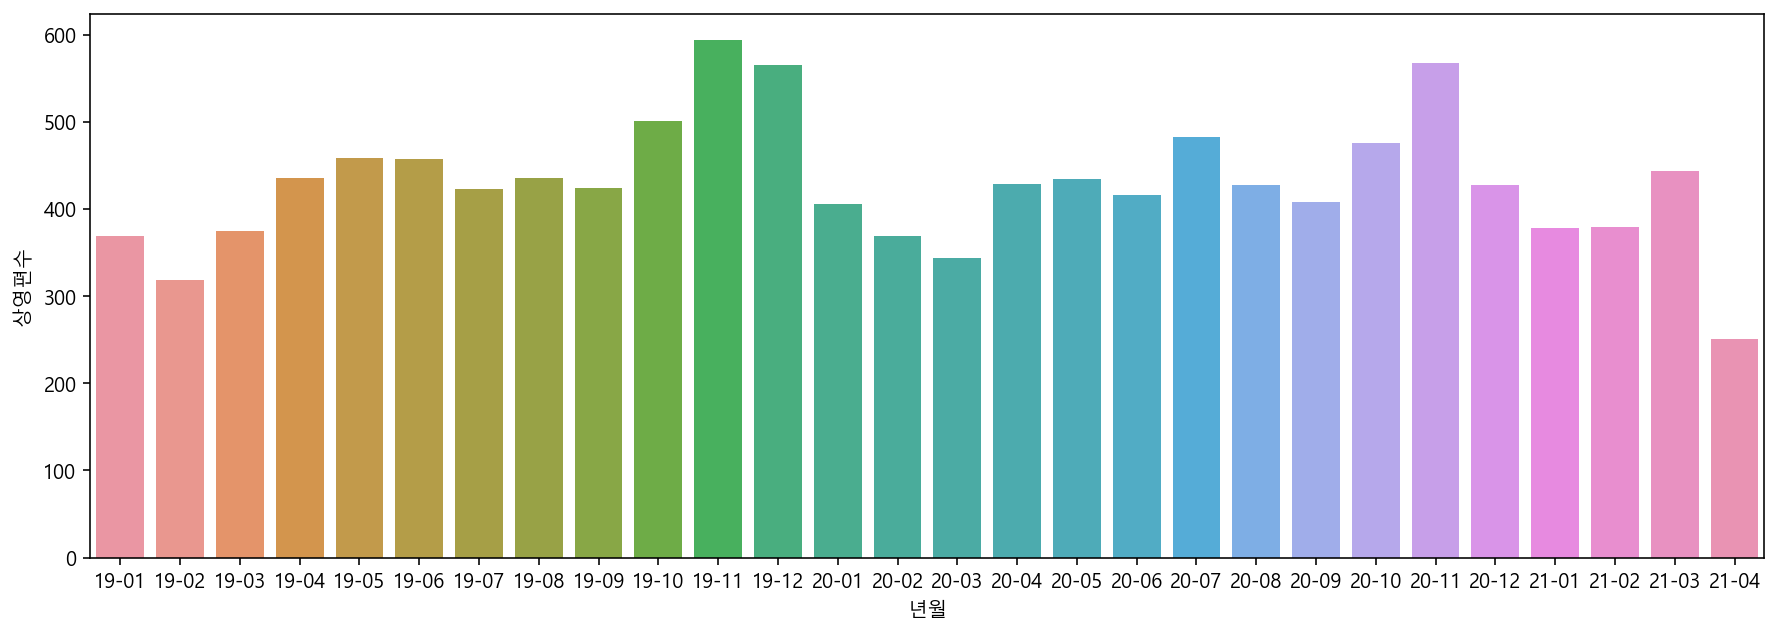

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(x='년월', y='개봉편수', data=df)
sns.barplot(x='년월', y='상영편수', data=df)

<AxesSubplot:xlabel='년월', ylabel='개봉편수'>

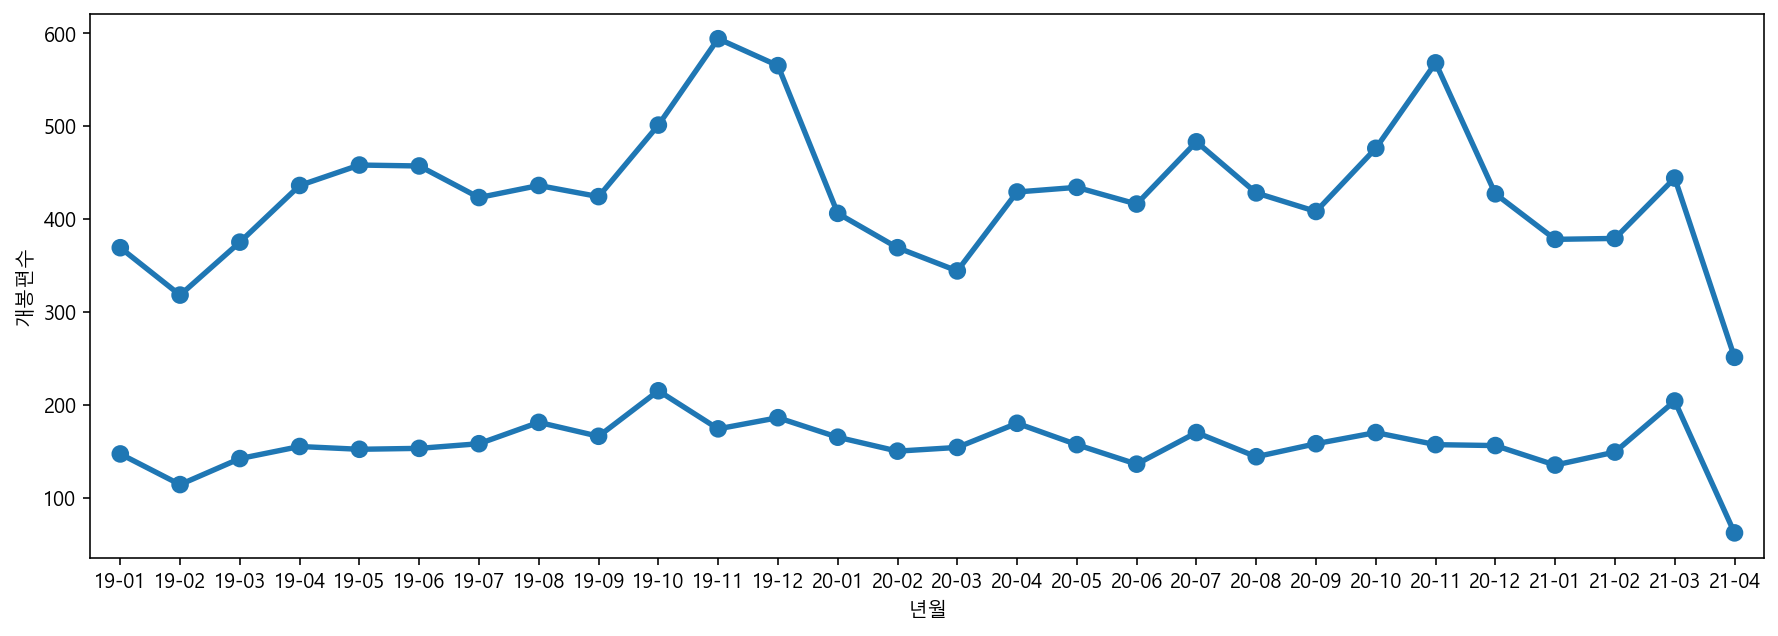

In [80]:
plt.figure(figsize=(15,5))
sns.pointplot(x='년월', y='상영편수', data=df)
sns.pointplot(x='년월', y='개봉편수', data=df)

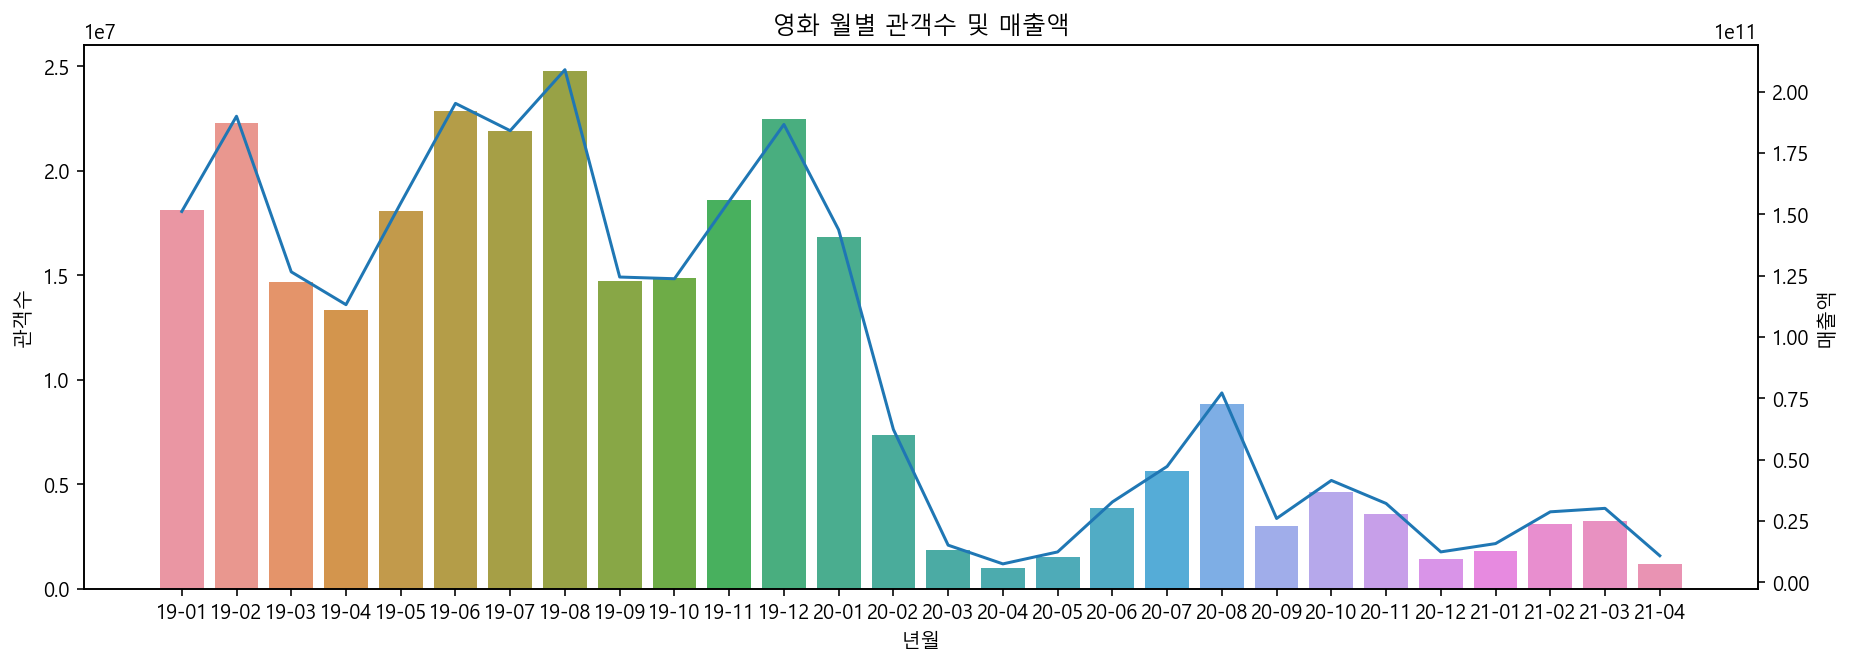

In [84]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='년월', y='관객수', data=df, ax=ax1)
ax2 = sns.lineplot(x='년월', y='매출액', data=df, ax=ax2)
plt.title('영화 월별 관객수 및 매출액')
plt.savefig('data2/영화_월별_관객수및매출액.jpg')

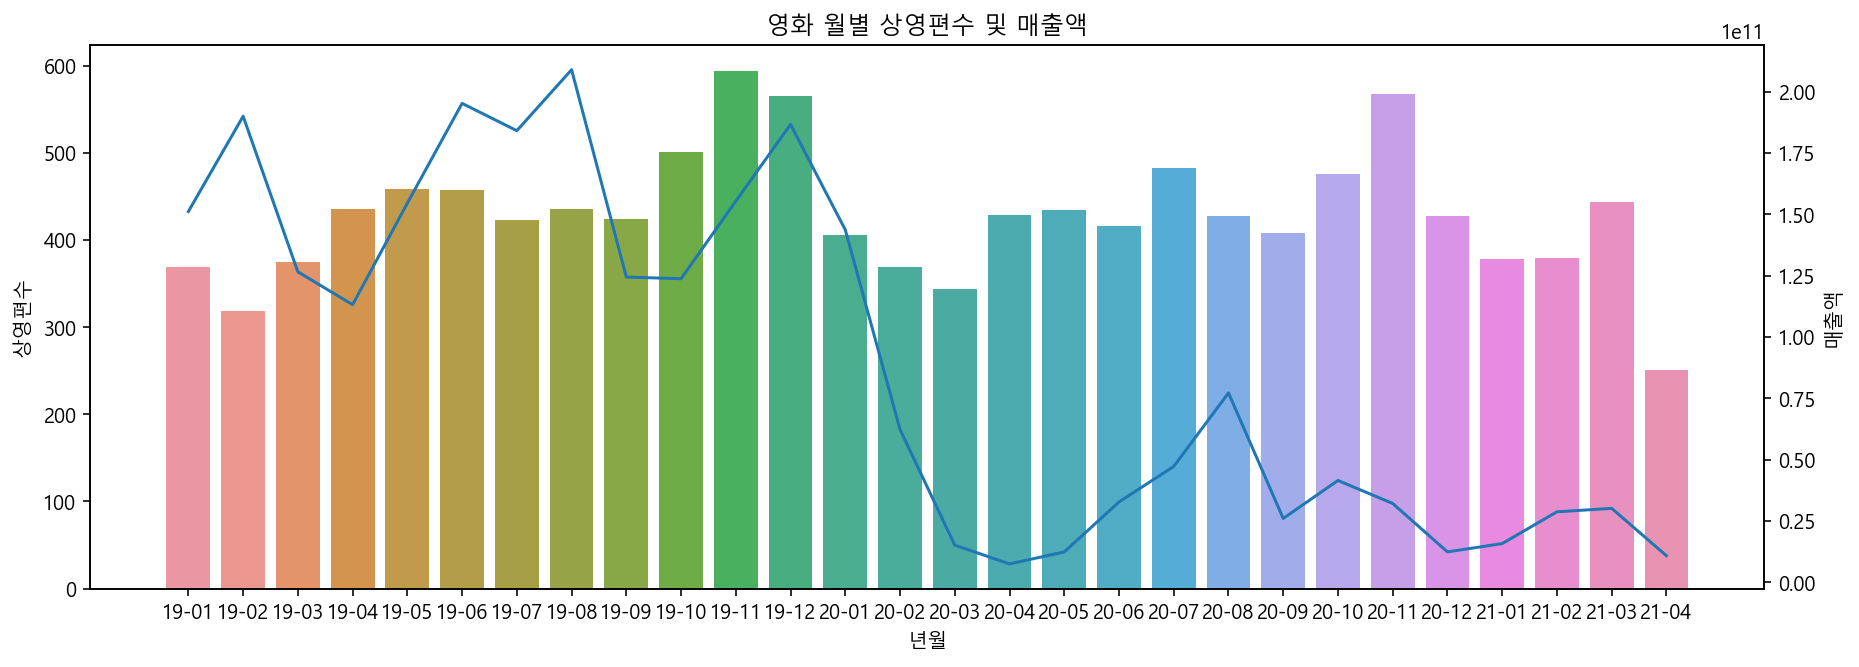

In [85]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='년월', y='상영편수', data=df, ax=ax1)
ax2 = sns.lineplot(x='년월', y='매출액', data=df, ax=ax2)
plt.title('영화 월별 상영편수 및 매출액')
plt.savefig('data2/영화_월별_상영편수및매출액.jpg')

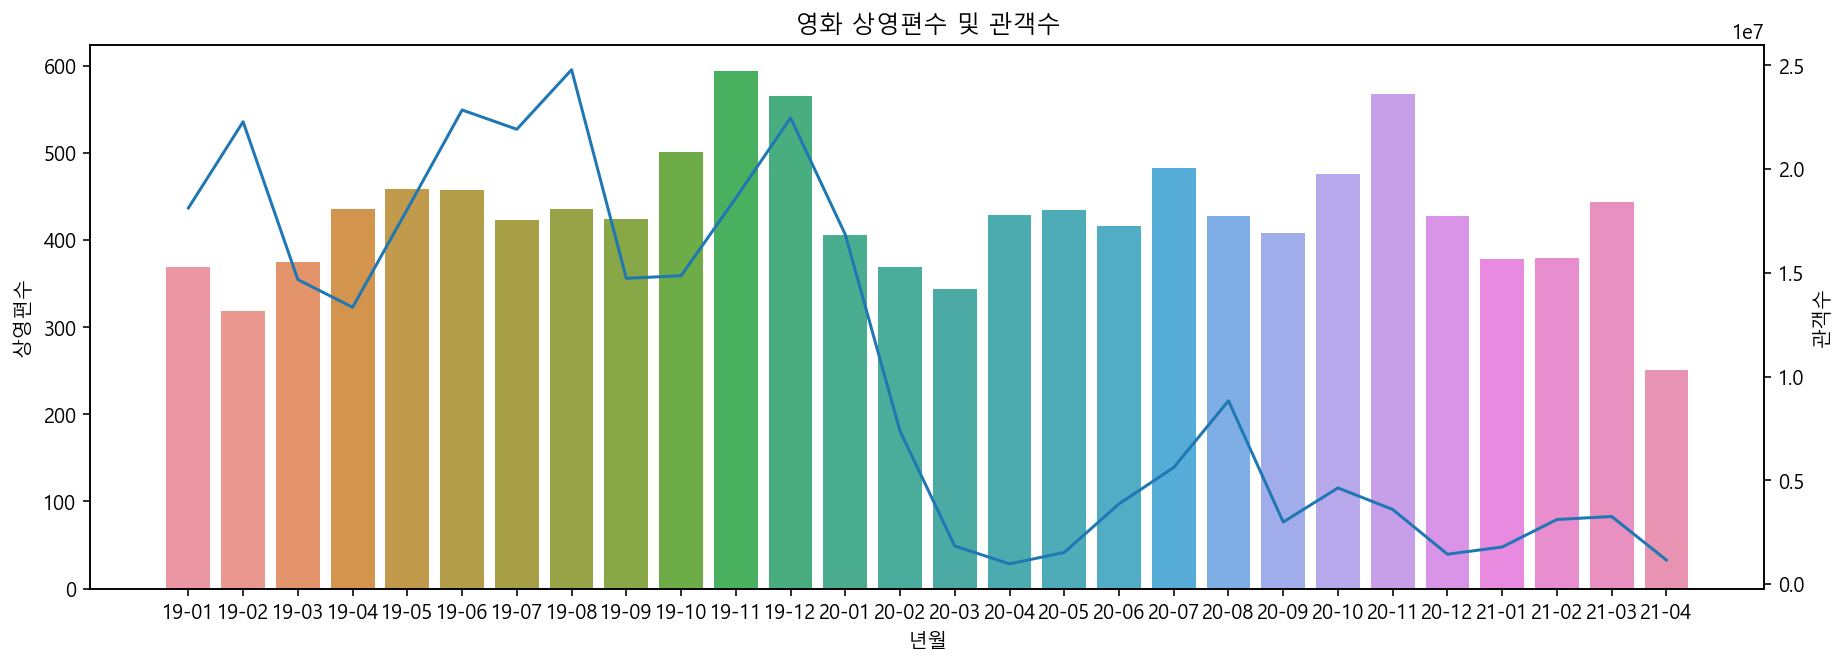

In [87]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='년월', y='상영편수', data=df, ax=ax1)
ax2 = sns.lineplot(x='년월', y='관객수', data=df, ax=ax2)
plt.title('영화 상영편수 및 관객수')
plt.savefig('data2/영화_월별_상영편수및관객수.jpg')